# Step 1: Import and Init

In [16]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import sys
import imageio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Step 2: Retrieve Data

In [27]:
# CSV file path
CSV_PATH = "Train_Crash_Table.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(CSV_PATH)

arr = []

for ind in df.index:
        arr.append(df["collision"])
print(len(arr))
df

10000


,subject,collision
0,00001.jpg,0
1,00002.jpg,0
2,00003.jpg,0
3,00004.jpg,0
4,00005.jpg,0
...,...,...
9995,09996.jpg,0
9996,09997.jpg,0
9997,09998.jpg,0
9998,09999.jpg,1


In [28]:
IMAGE_PATH = "C:\\\\Users\\sacha\\OneDrive\\Bureau\\CrashBest"
IMAGE_SCALE = 1/8
IMAGE_HEIGHT = int(720 * IMAGE_SCALE)
IMAGE_WIDTH = int(1280 * IMAGE_SCALE)

# Load images from the directory and create a dataset
dataset = keras.preprocessing.image_dataset_from_directory(IMAGE_PATH, labels=arr, batch_size=128, label_mode='int', image_size=(IMAGE_HEIGHT , IMAGE_WIDTH))

# Print the structure of the dataset
print(dataset.element_spec)


ValueError: Expected the lengths of `labels` to match the number of files in the target directory. len(labels) is 10000 while we found 75000 files in directory C:\\Users\sacha\OneDrive\Bureau\CrashBest.

# Step 3: Preparing the Data

In [7]:
# Normalize the images to the range [0, 1]
dataset = dataset.map(lambda x, y: (x / 255.0, y))


In [8]:

# Split the dataset into training (80%) and testing (20%)
train_size = int(len(dataset) * 0.8)

# Shuffle the dataset before splitting
dataset = dataset.shuffle(buffer_size=len(dataset))

# Split the dataset into training and testing sets
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

# Step 4: Build a Model

In [9]:
FILTER = 8

# Define the model architecture
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

#Block 1
model.add(keras.layers.Conv2D(FILTER, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(FILTER, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))

# Block 2
model.add(Conv2D(FILTER * 2, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(FILTER * 2, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))

# Block 3
#model.add(Conv2D(FILTER * 4, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(Conv2D(FILTER * 4, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binaire classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

c:\Users\sacha\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\henallux 2024-2025\Q2\Systèmes intelligents\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 90, 160, 8)     │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 90, 160, 8)     │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 160, 8)     │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 160, 8)     │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 40, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 40, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 40, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 40, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 40, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 10, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,801 (819.54 KB)

 Trainable params: 209,705 (819.16 KB)

 Non-trainable params: 96 (384.00 B)

# Step 5: Train the model

In [10]:
history = model.fit(train_ds, epochs=6, verbose=1, validation_data=test_ds)

Epoch 1/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 218s 333ms/step - accuracy: 0.6828 - loss: 0.8101 - val_accuracy: 0.7566 - val_loss: 0.5467
Epoch 2/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 354s 639ms/step - accuracy: 0.7580 - loss: 0.5471 - val_accuracy: 0.7636 - val_loss: 0.5193
Epoch 3/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 474s 681ms/step - accuracy: 0.7615 - loss: 0.5289 - val_accuracy: 0.7713 - val_loss: 0.4996
Epoch 4/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 226s 354ms/step - accuracy: 0.7687 - loss: 0.5120 - val_accuracy: 0.7744 - val_loss: 0.4807
Epoch 5/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 218s 344ms/step - accuracy: 0.7735 - loss: 0.4959 - val_accuracy: 0.7855 - val_loss: 0.4613
Epoch 6/6
468/468 ━━━━━━━━━━━━━━━━━━━━ 258s 404ms/step - accuracy: 0.7804 - loss: 0.4819 - val_accuracy: 0.7951 - val_loss: 0.4395


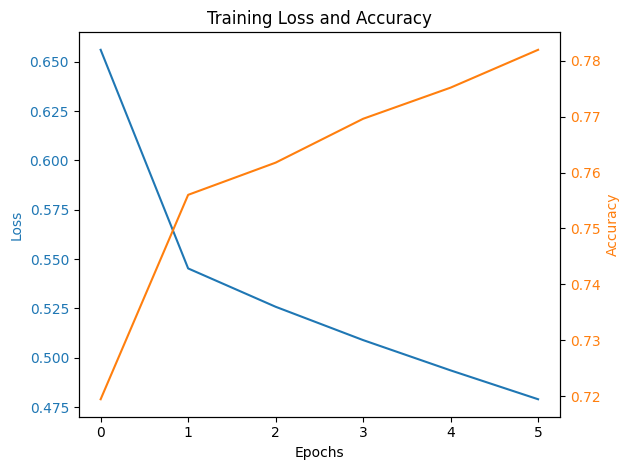

In [11]:
fig, ax1 = plt.subplots()

# Plot loss on the primary y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(history.history['loss'], label='Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:orange')
ax2.plot(history.history['accuracy'], label='Accuracy', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and show the plot
plt.title('Training Loss and Accuracy')
fig.tight_layout()
plt.show()

# Step 6 : Evaluation 

In [12]:
score = model.evaluate(test_ds, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.4447
Test accuracy : 0.7931


118/118 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step
              precision    recall  f1-score   support

           0     0.7456    1.0000    0.8543     11262
           1     0.0000    0.0000    0.0000      3842

    accuracy                         0.7456     15104
   macro avg     0.3728    0.5000    0.4271     15104
weighted avg     0.5560    0.7456    0.6370     15104

Accuracy: 0.7456


c:\Users\sacha\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\henallux 2024-2025\Q2\Systèmes intelligents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sacha\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\henallux 2024-2025\Q2\Systèmes intelligents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sacha\OneDrive - Haute Ecole de Namur-Liege-Luxembourg\henallux 2024-2025\Q2\Systèmes intelligents\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: Undefined

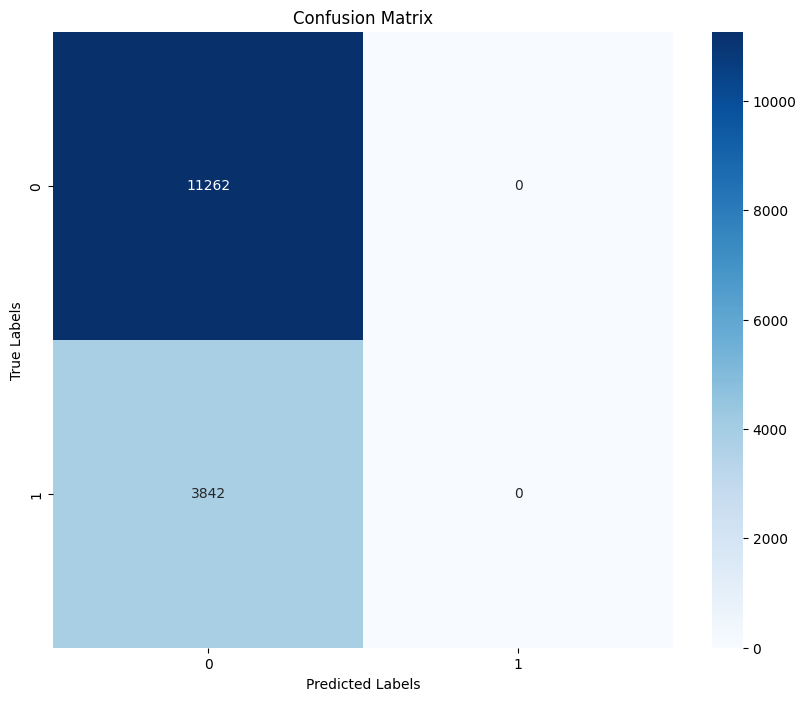

In [14]:
y_sigmoid = model.predict(test_ds)
y_pred = np.argmax(y_sigmoid, axis=-1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Extract true labels from the test dataset
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

# Ensure y_pred and y_true have the same shape
print(classification_report(y_true, y_pred, digits=4))
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 7 : Save the model

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model.save(f"CarCrashTensorflow_{timestamp}.keras")

# Step 8 : Load and try the model with new data

In [ ]:
model_path = "CarCrashTensorflow_20231003_123456.keras"  # Replace with your actual path

model2 = keras.models.load_model(model_path)

In [ ]:
anim_file = 'test.gif'
imgs = []
imgs[0].save(anim_file, save_all=True, append_images=imgs[1:], duration=100, loop=0)

In [ ]:
NewData = cv2.cvtColor(cv2.imread('NewCrash.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(NewData)

In [ ]:
NewData = cv2.resize(NewData,(256,256))
plt.imshow(NewData)

In [ ]:
NewData.shape

In [ ]:
y_sigmoid = model2.predict(NewData)
y_pred    = np.argmax(y_sigmoid, axis=-1)

if y_pred == 0:
    print(f"No crash detected with {y_sigmoid}%") 
else:
    print(f"Crash detected with {y_sigmoid}%")